# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

1. IMPORTING LIBRAIRIES

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt
import io
import re as re
from scipy.stats import chi2_contingency

2. LOADING FILES

In [ ]:
from google.colab import files
file =files.upload()

Saving commune.xlsx to commune (1).xlsx
Saving enroll.csv to enroll (1).csv
Saving industry.csv to industry (1).csv
Saving ord.csv to ord (1).csv
Saving quest.csv to quest (1).csv
Saving study_domain.csv to study_domain (1).csv
Saving technology.csv to technology (1).csv
Saving transaction.csv to transaction (1).csv


3. READING FILES

In [ ]:
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")
commune=pd.read_excel(r"commune.xlsx")

4. CONVERT INTO DUMMIES & GROUP BY COMMON COLUMN

In [ ]:
# concate ord and transaction columns
merge1=pd.concat([ord,transaction],axis=0)
merge1.head(2)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id,modified_at,course_id,transaction_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601,NaN,NaN,NaN


In [ ]:
# Rename columns Created_at in Transaction files
transaction.rename(columns={"created_at":"moncash_date"}, inplace=True)
transaction.head(2)

,Unnamed: 0,moncash_date,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160


In [ ]:
# We define a function in order to create dummies
def dummies_create(data, value):
  x=pd.get_dummies(data=data, columns=value, prefix="", prefix_sep="")
  dummies=x.groupby("quest_id").sum()
  return dummies

In [ ]:
# create dummies with study_domain, technology and industry2 files
study_domain2 = dummies_create(study_domain[["key", "quest_id", "values"]], ["values"])
technology2 = dummies_create(technology[["key", "quest_id", "values"]], ['values'])
industry2 = dummies_create(industry[["key", "quest_id", "values"]], ['values'])

In [ ]:
# Rename Create_at column in transaction file
transaction.rename(columns={"created_at":"payment_date"}, inplace=True)
transaction.head(2)

,Unnamed: 0,moncash_date,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160


In [ ]:
# Rename columns Created_at in Ord files
ord.rename(columns={"created_at":"credit_card_date"}, inplace=True)
ord.head(2)

,Unnamed: 0,credit_card_date,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601


In [ ]:
# Rename Create_at column in enroll file
enroll.rename(columns={"created_at":"Enroll_Date"}, inplace=True)
enroll.head(2)

,Unnamed: 0,Enroll_Date,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN


In [ ]:
# Rename Create_at column in quest file
quest.rename(columns={"created_at":"Application_date"}, inplace=True)
quest.head(2)

,Unnamed: 0,gender,dob,commune,Application_date,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
#Transform "Commune_Id" Values in lower Character
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
#Rename "Commune_Id" in "commune"
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)
commune.head(2)

,Commune_en,Commune_FR,commune,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03


5. MERGE DATAFRAME

In [ ]:
 # Merge Tables by "quest_id"
result = pd.merge(quest,enroll,how="left",on="quest_id")
result.head(2)

,Unnamed: 0_x,gender,dob,commune,Application_date,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,Enroll_Date,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result1 = pd.merge(result,ord,how="left",on="user_id")
result1.head(2)

,Unnamed: 0_x,gender,dob,commune,Application_date,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id_x,Unnamed: 0_y,Enroll_Date,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Unnamed: 0,credit_card_date,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id_y
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result2 = pd.merge(result1,transaction,how="left",on="user_id")
result2.head(2)

,Unnamed: 0_x,gender,dob,commune,Application_date,modified_at_x,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id_x,Unnamed: 0_y,Enroll_Date,expiry_date,user_id,course_name,course_id_x,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Unnamed: 0_x,credit_card_date,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id_y,Unnamed: 0_y,moncash_date,modified_at_y,course_id_y,transaction_id
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 # create columns named "is_enroll"
result2["is_enroll"] = 'No'
result2.loc[~result2.Enroll_Date.isna(),["is_enroll"]] ="Yes"
result2.head(2)

,Unnamed: 0_x,gender,dob,commune,Application_date,modified_at_x,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id_x,Unnamed: 0_y,Enroll_Date,expiry_date,user_id,course_name,course_id_x,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Unnamed: 0_x,credit_card_date,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id_y,Unnamed: 0_y,moncash_date,modified_at_y,course_id_y,transaction_id,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [ ]:
# create columns named "payed"
result2["payed"] = 'No'
result2.loc[~(result2.credit_card_date.isna() & result2.moncash_date.isna()),["payed"]] ="Yes"
result2.head(2)

,Unnamed: 0_x,gender,dob,commune,Application_date,modified_at_x,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id_x,Unnamed: 0_y,Enroll_Date,expiry_date,user_id,course_name,course_id_x,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Unnamed: 0_x,credit_card_date,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id_y,Unnamed: 0_y,moncash_date,modified_at_y,course_id_y,transaction_id,is_enroll,payed
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [ ]:
#rename columns quest_id_x in result2 file
result2.rename(columns={"quest_id_x":"quest_id"}, inplace=True)

In [ ]:
# merge tables on "quest_id"
result3=pd.merge(result2,study_domain2, how = 'left',on='quest_id')

In [ ]:
#Merge tables
result4=pd.merge(result3,technology2, how = 'left',on='quest_id')

In [ ]:
# Merge tables
result4=pd.merge(result3,technology2, how = 'left',on='quest_id')

In [ ]:
# Merge tables
result5=pd.merge(result4,industry2, how = 'left',on='quest_id')

In [ ]:
 # Merge Result4 and Commune
result6=pd.merge(result4,commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')

In [ ]:
print(result6.loc[result6["dob"]=="3 aout 1977",:])

    Unnamed: 0_x  gender          dob  ... other_y      Commune_FR Departement
13            13  female  3 aout 1977  ...     0.0  Port-au-Prince        West

[1 rows x 73 columns]


In [ ]:
result6.drop(result6.loc[result6['dob']=="3 aout 1977"].index, inplace=True)
print(result6.loc[result6["dob"]=="3 aout 1977",:])

Empty DataFrame
Columns: [Unnamed: 0_x, gender, dob, commune, Application_date, modified_at_x, department, education_level, university, study_domain, current_employed, formal_sector_job, have_computer_home, internet_at_home, hear_AA_1, after_AA, quest_id, Unnamed: 0_y, Enroll_Date, expiry_date, user_id, course_name, course_id_x, percentage_completed, completed_at, expired, is_free_trial, completed, started_at, activated_at, updated_at, Unnamed: 0_x, credit_card_date, product_name, product_id, amount_dollars, amount_cents, subscription, coupon_code, coupon_id, affiliate_referral_code, status, quest_id_y, Unnamed: 0_y, moncash_date, modified_at_y, course_id_y, transaction_id, is_enroll, payed, Accounting, Computer Science, Economics, Electrical Engineering, Law, Management, Medicine, Statistics, other_x, Bash, Excel, Git, Java, JavaScript, PHP, PowerBI or Tableau, Python, R, SQL, VBA, other_y, Commune_FR, Departement]
Index: []


In [ ]:
result6["Application_date"]= pd.to_datetime(result6["Application_date"])
result6["Application_date"] = result6["Application_date"].apply(lambda x: str(x)[:10])
result6["Application_date"].head(6)

0    2021-02-14
1    2021-02-16
2    2021-02-16
3    2021-02-16
4    2021-02-16
5    2021-02-16
Name: Application_date, dtype: object

In [ ]:
from datetime import date
def Calculate_Age(born) :
    """
    This function will allow us to calcute the age of all the applicants by the end of the application process
    """
    today = date(2021,6,18)
    return today.year - born.year - ((today.month,today.day)<(born.month,born.day))

In [ ]:
result6["dob"]= pd.to_datetime(result6["dob"])
result6["dob"].head(2)

0   1998-08-25
1   1996-09-29
Name: dob, dtype: datetime64[ns]

In [ ]:
result6['age'] = result6['dob'].apply(Calculate_Age)
result6['age']

0      22.0
1      24.0
2      25.0
3      24.0
4      23.0
       ... 
245    27.0
246    30.0
247    27.0
248    29.0
249    27.0
Name: age, Length: 249, dtype: float64

In [ ]:
def converdate (data, column):
    data[column] = pd.to_datetime(data[column], format ='%Y-%m-%d')
    
    return data

In [ ]:
# Apply the function
# converdate(result6, result6.moncash_date)

In [ ]:
result6["credit_card_date"]= pd.to_datetime(result6["credit_card_date"])
result6["credit_card_date"] = result6["credit_card_date"].apply(lambda x: str(x)[:10])
result6["credit_card_date"].tail(6)

244           NaT
245           NaT
246           NaT
247    2021-03-14
248           NaT
249           NaT
Name: credit_card_date, dtype: object

In [ ]:
result6["moncash_date"]= pd.to_datetime(result6["moncash_date"])
result6["moncash_date"] = result6["moncash_date"].apply(lambda x: str(x)[:10])
result6["moncash_date"].tail(6)

244           NaT
245    2021-03-02
246           NaT
247           NaT
248    2021-03-08
249    2021-03-14
Name: moncash_date, dtype: object

In [ ]:
#result6["Enroll_Date"]= pd.to_datetime(result6["Enroll_Date"])
#result6["Enroll_Date"] = result6["Enroll_Date"].apply(lambda x: str(x)[:10])
#result6["Enroll_Date"].tail(6)

In [ ]:
drop_col =  ['commune','Unnamed: 0_x', 'modified_at_x',  'study_domain','Unnamed: 0_y','expiry_date', 'user_id', 'course_name','course_id_x', 'percentage_completed','completed_at', 'expired', 'is_free_trial', 'completed', 'started_at', 'activated_at', 'updated_at', 'Unnamed: 0_x', 'product_name','product_id', 'amount_dollars', 'amount_cents', 'subscription','coupon_code', 'coupon_id', 'affiliate_referral_code', 'status','quest_id_y', 'Unnamed: 0_y', 'modified_at_y','course_id_y', 'transaction_id', 'modified_at_y','other_y', 'other_x', 'other_y','department']
len(drop_col)

37

In [ ]:
result6.drop(drop_col, axis="columns", inplace=True)

In [ ]:
# rename columns
result6.rename(columns={"hear_AA_1":"communication_channel",'after_AA':"Bootcamp_Interest", "hear_AA_1":"communication_channel",'after_AA':"Bootcamp_Interest", "Commune_FR":"commune", "PowerBI or Tableau":"PowerBI_Tableau", "quest_id": "Nbr_of_applicants"}, inplace=True)
data = result6
data.head(2)

,gender,dob,Application_date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,communication_channel,Bootcamp_Interest,Nbr_of_applicants,Enroll_Date,credit_card_date,moncash_date,is_enroll,payed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI_Tableau,Python,R,SQL,VBA,commune,Departement,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,2021-02-14T23:15:19.500Z,NaT,NaT,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,22.0
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaT,NaT,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,24.0


###  1. How many observations and variables are there in the dataset
 

In [ ]:
s = data.shape
print(f'There are {s[0]} obeservations and {s[1]} variables in this dataset')

There are 249 obeservations and 39 variables in this dataset


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

2.A Calculate the average age of the observations

In [ ]:
# On teh whole dataset
avg_age = data["age"].mean()
print(f'People in this dataset have {avg_age:.2f} years old in average')

People in this dataset have 26.67 years old in average


In [ ]:
# On the whole male dataset
age_male = data[data['gender']=="male"]
male=age_male.age
mal=age_male.age.mean()
print(f'Man have {mal:.2f} years old in average')

Man have 27.07 years old in average


In [ ]:
# On the whole female dataset
age_female = data[data['gender']=="female"]
female = age_female.age
f_mal=age_female.age.mean()
print(f'Woman have {f_mal:.2f} years old in average')

Woman have 24.91 years old in average


2.B variance of the whole datatset,male and female

In [ ]:
# variance of the whole datatset
var = data["age"].var()
print(f'{var:.2f} is the variance of age the whole age dataset')

50.86 is the variance of age the whole age dataset


In [ ]:
# variance of the whole male
var_male = male.var()
print(f'{var_male:.2f} is the variance of age for the male dataset')

50.12 is the variance of age for the male dataset


In [ ]:
# variance of the whole female
var_female = female.var()
print(f'{var_female:.2f} is the variance of age for the female dataset')

51.53 is the variance of age for the female dataset


In [ ]:
# kurtosis of the whole datatset
kurto = data['age'].kurtosis(skipna = True)
print(f'{kurto:.2f} is the Kurtosis of age for the whole dataset')

5.18 is the Kurtosis of age for the whole dataset


In [ ]:
# kurtosis of the female datatset
kuto_fem = female.kurtosis(skipna = True)
print(f'{kuto_fem:.2f} is the Kurtosis of age for the female dataset')

6.00 is the Kurtosis of age for the female dataset


In [ ]:
# kurtosis of the male datatset
kurto_male = male.kurtosis(skipna=True)
print(f'{kurto_male:.2f} is the Kurtosis of age for the male dataset')

5.26 is the Kurtosis of age for the male dataset


In [ ]:
# Skewness of the whole male
skewness = male.skew(skipna = True)
skew = abs(skewness)
print(f'The Skewness for age varies between {skewness:.2f} and +{skew:.2f} for the female dataset')

The Skewness for age varies between -0.71 and +0.71 for the female dataset


In [ ]:
# Skewness of the whole female
skew_f =  female.skew(skipna = True)
skewn_f = abs(skew_f)
print(f'The Skewness for age varies between {skew_f:.2f} and +{skewn_f:.2f} for the male dataset')

The Skewness for age varies between -1.14 and +1.14 for the male dataset


In [ ]:
Age=(data["age"].fillna(data.age.mean()))

In [ ]:
# Does the age distribution follow a normal distribution
#Import scipy.stats
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Age)
print('Statistics=%.3f, p=%.3f\n' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The age distribution looks like a normal distribution\n')
    print ('Fail to reject the null Hypothesis H0')
else:
    print('The age distribution looks like a normal distribution\n')
    print('We Reject H0')

Statistics=0.851, p=0.000

The age distribution looks like a normal distribution

We Reject H0


The graph below confirm the Shapiro test above




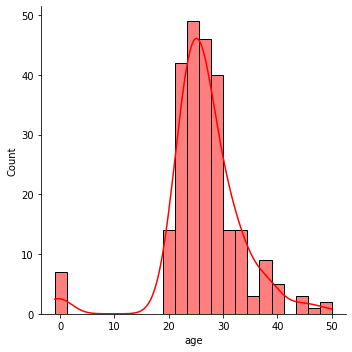

In [ ]:
print(f'The graph below confirm the Shapiro test above\n\n')
sns.displot(Age,color="r", kde=True)

### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [ ]:
# DFunction for dissplaying the age frequency disbrution on the whole dataset
def frequency(data="data"):
    freq = data["age"].value_counts(normalize=True).to_frame()
    dist = sns.displot(freq, kde=True)
    return dist 

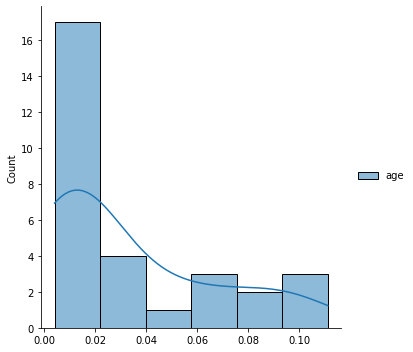

In [ ]:
# Dissplay the age frequency disbrution on the whole dataset
whole_freq = frequency(data)

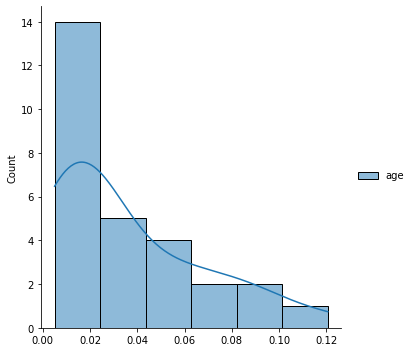

In [ ]:
# Dissplay the age frequency disbrution on the male dataset
m_freq = frequency(age_male)

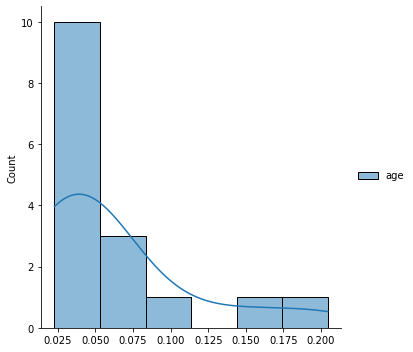

In [ ]:
# Dissplay the age frequency disbrution on the male dataset
m_freq = frequency(age_female)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [ ]:
# One-Sample T-Test with Wilcoxon test
# H0: Mu=24
# H1: Mu!=24
from scipy import stats
stat, p =stats.wilcoxon(data.age-24)
print("Statistics = %.2f, p = %.2f\n" % (stat, p))
#interpretation
alpha=0.05
if p > alpha:
    print('Fail to reject H0: H0 mu = 24')
else:
    print("We reject H0\n")

    print("We cannot assume that the average age (24 years old) of the observations could\n"
    "Be considered as the average age of the population likely to participate in this Bootcamp")

Statistics = 5092.50, p = 0.00

We reject H0

We cannot assume that the average age (24 years old) of the observations could
Be considered as the average age of the population likely to participate in this Bootcamp


### 5. Calculate the average age of participants for each communication channel

In [ ]:
# create table for communications channel
channels_mean_age=round(pd.pivot_table(data,index="communication_channel", values='age', aggfunc='mean'),2)
channels_mean_age

,age
communication_channel,
Ayiti Analytics Website,27.20
Bootcamp Alumni,26.64
ESIH,23.65
Facebook,25.82
Friend,26.85
Instagram,25.40
LinkedIn,30.50
WhatsApp,26.75
other,28.67


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Age distribution by communication channel')

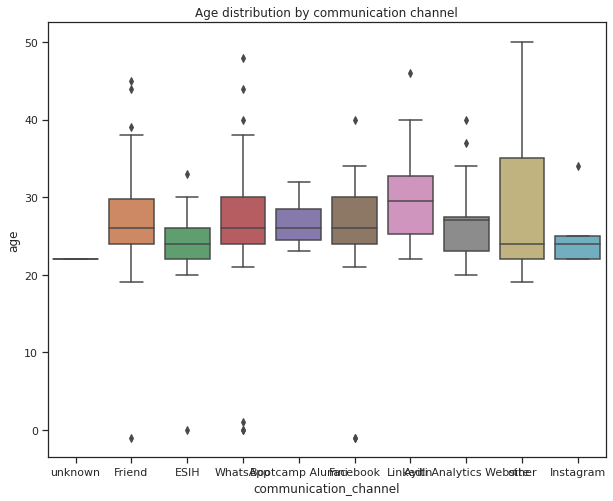

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style="ticks")
ax = sns.boxplot(x=data['communication_channel'], y=data['age'], data=data)
plt.title('Age distribution by communication channel')

### 7 .Is there a significant age difference between these groups

In [ ]:
channel = data['communication_channel']
data["age"]=data.age.fillna(data.age.mean())
ESIH = data[channel=="ESIH"].age
Friend = data[channel=="Friend"].age
WhatsApp = data[channel=="WhatsApp"].age
Website = data[channel=="Ayiti Analytics Website"].age
Alumni = data[channel=="Bootcamp Alumni"].age
Instagram = data[channel=="Instagram"].age
LinkedIn = data[channel=="LinkedIn"].age

In [ ]:
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('data["age"] ~ C(channel)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)
alpha=0.05
p = aov_table["PR(>F)"][0]
print("\n")
print(p)
if p > alpha:
    print('Fail to reject H0')
    print("The differences between channel group means are not statistically significant")
else:
    print("We reject H0\n")

    print("The differences between some of the means are statistically significant")


,sum_sq,df,F,PR(>F)
C(channel),437.850629,9.0,0.979603,0.457482
Residual,11869.466243,239.0,NaN,NaN




0.4574821151539047
Fail to reject H0
The differences between channel group means are not statistically significant


The graph below confirm the test above




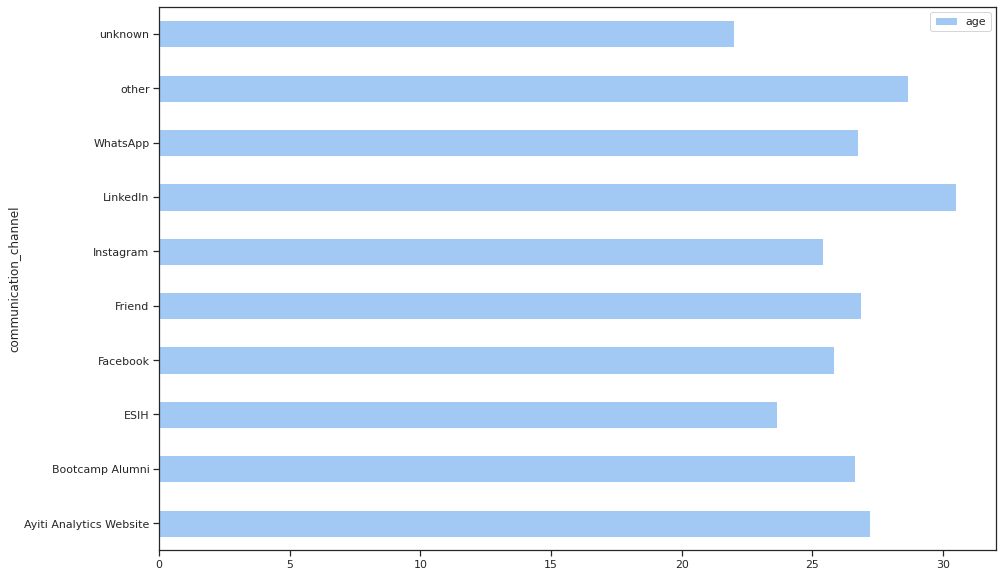

In [ ]:
print(f'The graph below confirm the test above')
from matplotlib.colors import ListedColormap
# Show communication channel by age avg
print("\n")
fig20 =channels_mean_age.plot(kind='barh', stacked=False, colormap=ListedColormap(sns.color_palette("pastel", 10)), figsize=(15,10))

### 8.Plan a BA strategy for each communication channel regarding the age group

In [ ]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [ ]:
# a conditional probability function
def proba_c1_knowing_c2(data=data,c1="communication_channel", c2="gender", c2_mod="", normalize='index'):
  tab_prob=pd.crosstab(data[c2],data[c1],normalize="index")
  print(f"Probability of {c1} knowing {c2} ={c2_mod}: ")
  if c2_mod in tab_prob.index:
    for col in tab_prob.columns:
      print(f"The probability of using {col} as {c1} knowing {c2_mod} is: {round(tab_prob.at[c2_mod, col],4)}")
  else:
    for col in tab_prob.index:
      print(f"The probability of {c1} as {c2_mod} knowing {col} is: {round(tab_prob.at[col,c2_mod],4)}")

In [ ]:
proba_c1_knowing_c2(c2_mod="female")

Probability of communication_channel knowing gender =female: 
The probability of using Ayiti Analytics Website as communication_channel knowing female is: 0.087
The probability of using Bootcamp Alumni as communication_channel knowing female is: 0.1739
The probability of using ESIH as communication_channel knowing female is: 0.1087
The probability of using Facebook as communication_channel knowing female is: 0.1087
The probability of using Friend as communication_channel knowing female is: 0.2391
The probability of using Instagram as communication_channel knowing female is: 0.0217
The probability of using LinkedIn as communication_channel knowing female is: 0.0217
The probability of using WhatsApp as communication_channel knowing female is: 0.1957
The probability of using other as communication_channel knowing female is: 0.0435
The probability of using unknown as communication_channel knowing female is: 0.0


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [ ]:
#here your codes
proba_c1_knowing_c2(data=data,c1="gender", c2="communication_channel", c2_mod="female", normalize='index')

Probability of gender knowing communication_channel =female: 
The probability of gender as female knowing Ayiti Analytics Website is: 0.2667
The probability of gender as female knowing Bootcamp Alumni is: 0.5714
The probability of gender as female knowing ESIH is: 0.2778
The probability of gender as female knowing Facebook is: 0.1282
The probability of gender as female knowing Friend is: 0.1642
The probability of gender as female knowing Instagram is: 0.2
The probability of gender as female knowing LinkedIn is: 0.0667
The probability of gender as female knowing WhatsApp is: 0.1364
The probability of gender as female knowing other is: 0.2222
The probability of gender as female knowing unknown is: 0.0


### 11. Deduce the probability of being a woman knowing each communication channel

In [ ]:
#here your codes
proba_c1_knowing_c2(data=data,c1="gender", c2="communication_channel", c2_mod="female", normalize='index')

Probability of gender knowing communication_channel =female: 
The probability of gender as female knowing Ayiti Analytics Website is: 0.2667
The probability of gender as female knowing Bootcamp Alumni is: 0.5714
The probability of gender as female knowing ESIH is: 0.2778
The probability of gender as female knowing Facebook is: 0.1282
The probability of gender as female knowing Friend is: 0.1642
The probability of gender as female knowing Instagram is: 0.2
The probability of gender as female knowing LinkedIn is: 0.0667
The probability of gender as female knowing WhatsApp is: 0.1364
The probability of gender as female knowing other is: 0.2222
The probability of gender as female knowing unknown is: 0.0


### 13. Deduce the probability of being a woman knowing each communication channel

In [ ]:
# here your codes
proba_c1_knowing_c2(data=data,c1="gender", c2="communication_channel", c2_mod="female", normalize='index')

Probability of gender knowing communication_channel =female: 
The probability of gender as female knowing Ayiti Analytics Website is: 0.2667
The probability of gender as female knowing Bootcamp Alumni is: 0.5714
The probability of gender as female knowing ESIH is: 0.2778
The probability of gender as female knowing Facebook is: 0.1282
The probability of gender as female knowing Friend is: 0.1642
The probability of gender as female knowing Instagram is: 0.2
The probability of gender as female knowing LinkedIn is: 0.0667
The probability of gender as female knowing WhatsApp is: 0.1364
The probability of gender as female knowing other is: 0.2222
The probability of gender as female knowing unknown is: 0.0


### 14. Deduce the probability of being a man knowing each communication channel

In [ ]:
# here your codes
proba_c1_knowing_c2(data=data,c1="gender", c2="communication_channel", c2_mod="male", normalize='index')

Probability of gender knowing communication_channel =male: 
The probability of gender as male knowing Ayiti Analytics Website is: 0.7333
The probability of gender as male knowing Bootcamp Alumni is: 0.4286
The probability of gender as male knowing ESIH is: 0.7222
The probability of gender as male knowing Facebook is: 0.8718
The probability of gender as male knowing Friend is: 0.8358
The probability of gender as male knowing Instagram is: 0.8
The probability of gender as male knowing LinkedIn is: 0.9333
The probability of gender as male knowing WhatsApp is: 0.8636
The probability of gender as male knowing other is: 0.7778
The probability of gender as male knowing unknown is: 1.0


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [ ]:
# Gender distribution by channel
data["index"]=data.index
gender_com=pd.pivot_table(data,values="index", index=['gender',],
columns=['communication_channel'], aggfunc="count",fill_value =0)
gender_com

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4,8,5,5,11,1,1,9,2,0
male,11,6,13,34,56,4,14,57,7,1


In [ ]:
# plot the graph
fig1 =gender_com.plot(kind='barh', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 10)), 
          figsize=(15,10))

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

In [ ]:
# here your codes
# Apply Test
stat, p, dof, expected = chi2_contingency(gender_com.values)
print("p-values:",p)
if p < 0.05:
 print("We reject Ho : There is a dependency between communication channels and gender")
else:
 print("Fail to rejected Ho : There is no dependency between communication channels and gender")

p-values: 0.022373040503073267
We reject Ho : There is a dependency between communication channels and gender


### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [ ]:
# Summarise dataframe using pivot table: communication channel &  Bootcamp Interest
inter_comm=pd.pivot_table(data,values="index", index=['Bootcamp_Interest',],
 columns=['communication_channel'], aggfunc="count",fill_value =0)

inter_comm

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
Bootcamp_Interest,,,,,,,,,,
Finding a job/internship,1,3,2,10,10,2,2,11,2,0
Improving my data analysis skills,9,8,12,20,38,0,10,29,4,0
Mentorship,1,0,1,2,1,0,0,6,1,0
Switching careers,2,1,0,3,4,1,1,8,0,0
Training to start my own company,2,1,2,4,14,2,2,11,1,0
other,0,0,1,0,0,0,0,1,1,0
unknown,0,1,0,0,0,0,0,0,0,1


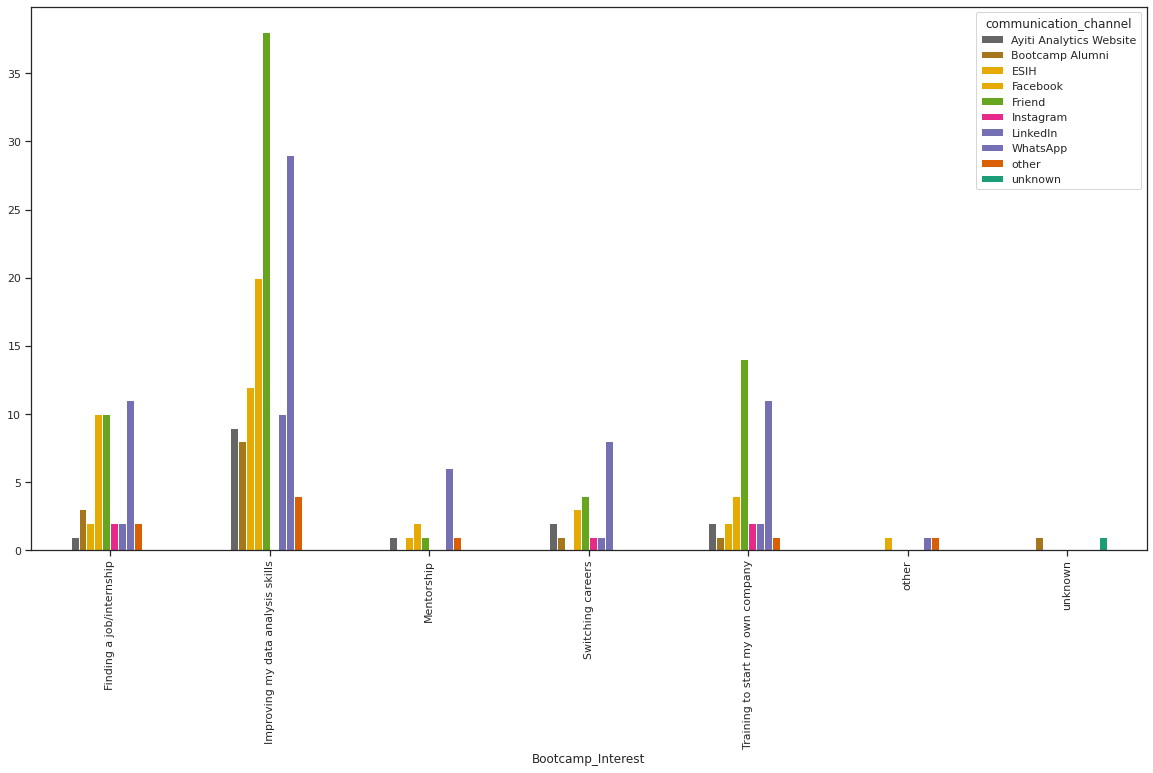

In [ ]:
fig1 =fig1 =inter_comm.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("Dark2_r", 10)), 
          figsize=(20,10)).plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("Dark2_r", 10)), 
          figsize=(15,10))

In [ ]:
# the test
stat, p, dof, expected = chi2_contingency(inter_comm.values)
print("p-values:",p)
if p < 0.05:
 print("We reject Ho : There is a dependency between communication channels and Bootcamp Insterest")
else:
 print("Fail to reject Ho : There areinter_comm no dependency between communication channels and Bootcamp Insterest")

p-values: 3.3440043828564116e-14
We reject Ho : There is a dependency between communication channels and Bootcamp Insterest


### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [ ]:
#Filt communication channel by quest_id and gender
print("\n")
cha_gender=pd.pivot_table(data=data,values="Nbr_of_applicants",index="communication_channel",columns="gender",aggfunc="count")
print(f'Gender distribution by communication channel')
display(cha_gender)
print("\n\n\n")
#Filt Bootcamp Interest by quest_id and gender
boo_gender=pd.pivot_table(data=data,values="Nbr_of_applicants",index="Bootcamp_Interest",columns="gender",aggfunc="count")
print(f'Gender distribution by Bootcamp interest')
display(boo_gender)



Gender distribution by communication channel


gender,female,male
communication_channel,,
Ayiti Analytics Website,4.0,11.0
Bootcamp Alumni,8.0,6.0
ESIH,5.0,13.0
Facebook,5.0,34.0
Friend,11.0,56.0
Instagram,1.0,4.0
LinkedIn,1.0,14.0
WhatsApp,9.0,57.0
other,2.0,7.0






Gender distribution by Bootcamp interest


gender,female,male
Bootcamp_Interest,,
Finding a job/internship,10.0,33.0
Improving my data analysis skills,24.0,106.0
Mentorship,3.0,9.0
Switching careers,3.0,17.0
Training to start my own company,6.0,33.0
other,NaN,3.0
unknown,NaN,2.0


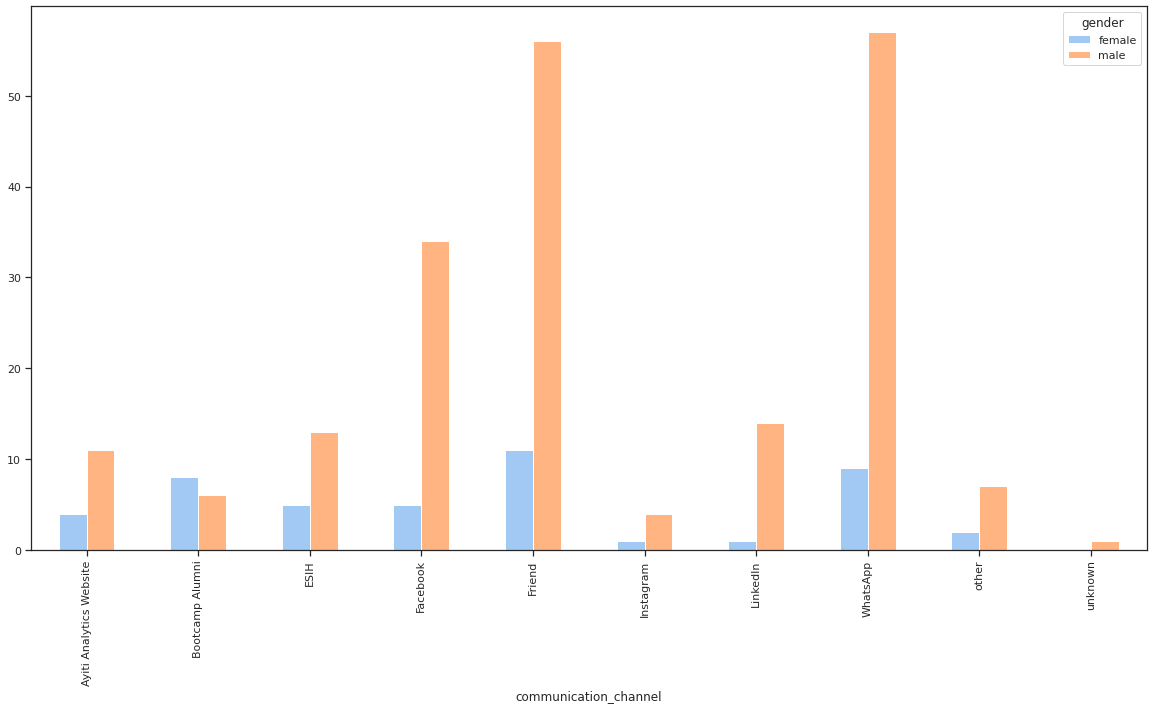

In [ ]:
# communication channel by gender
fig18 =cha_gender.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [ ]:
# shape 
Yes=len(data[data["payed"]=="Yes"])
No=len(data)-Yes

In [ ]:
tablo_yes=pd.pivot_table(data[data['payed']=="Yes"], values="Nbr_of_applicants", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
tablo_yes=tablo_yes/Yes
print("Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category")
display(tablo_yes)

#here your code
tablo_no=pd.pivot_table(data[data['payed']=="No"], values="Nbr_of_applicants", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
tablo_no=tablo_no/No
print("Probabilities for a non-payed applicant by Bootcamp interest , communication channel and gender category")
display(tablo_no)

Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category


Nbr_of_applicants
Bootcamp_Interest                 communication_channel   gender                   
Finding a job/internship          Ayiti Analytics Website male             0.015385
                                  Bootcamp Alumni         female           0.015385
                                  ESIH                    male             0.015385
                                  Facebook                male             0.015385
                                  Friend                  female           0.015385
                                                          male             0.030769
                                  Instagram               male             0.015385
                                  LinkedIn                male             0.015385
                                  WhatsApp                female           0.015385
                                                          male             0.046154
Improving my data analysis skills Ayiti Analytics Website male             0.015385
                                  Bootcamp Alumni         female           0.015385
                                                          male             0.076923
                                  ESIH                    male             0.030769
                                  Facebook                female           0.030769
                                                          male             0.076923
                                  Friend                  female           0.030769
                                                          male             0.215385
                                  LinkedIn                female           0.015385
                                                          male             0.015385
                                  WhatsApp                female           0.046154
                                                          male             0.046154
                                  other                   male             0.015385
Mentorship                        other                   female           0.015385
Switching careers                 Bootcamp Alumni         female           0.015385
Training to start my own company  Ayiti Analytics Website male             0.015385
                                  Facebook                male             0.015385
                                  Friend                  male             0.046154
                                  WhatsApp                male             0.030769
other                             ESIH                    male             0.015385
                                  WhatsApp                male             0.015385

Probabilities for a non-payed applicant by Bootcamp interest , communication channel and gender category


Nbr_of_applicants
Bootcamp_Interest                 communication_channel   gender                   
Finding a job/internship          Bootcamp Alumni         female           0.010870
                                  ESIH                    male             0.005435
                                  Facebook                female           0.010870
                                                          male             0.038043
                                  Friend                  female           0.016304
                                                          male             0.021739
                                  Instagram               male             0.005435
                                  LinkedIn                male             0.005435
                                  WhatsApp                male             0.038043
                                  other                   male             0.010870
Improving my data analysis skills Ayiti Analytics Website female           0.010870
                                                          male             0.032609
                                  Bootcamp Alumni         female           0.010870
                                  ESIH                    female           0.016304
                                                          male             0.038043
                                  Facebook                male             0.070652
                                  Friend                  female           0.021739
                                                          male             0.097826
                                  LinkedIn                male             0.043478
                                  WhatsApp                female           0.016304
                                                          male             0.108696
                                  other                   female           0.005435
                                                          male             0.010870
Mentorship                        Ayiti Analytics Website male             0.005435
                                  ESIH                    female           0.005435
                                  Facebook                female           0.005435
                                                          male             0.005435
                                  Friend                  male             0.005435
                                  WhatsApp                male             0.032609
Switching careers                 Ayiti Analytics Website female           0.005435
                                                          male             0.005435
                                  Facebook                male             0.016304
                                  Friend                  male             0.021739
                                  Instagram               male             0.005435
                                  LinkedIn                male             0.005435
                                  WhatsApp                female           0.005435
                                                          male             0.038043
Training to start my own company  Ayiti Analytics Website female           0.005435
                                  Bootcamp Alumni         female           0.005435
                                  ESIH                    female           0.005435
                                                          male             0.005435
                                  Facebook                male             0.016304
                                  Friend                  female           0.005435
                                                          male             0.054348
                                  Instagram               female           0.005435
                                                          male             0.005435
                                  

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [ ]:
# here your codes
result8=data[(data["Bootcamp_Interest"]=="Improving my data analysis skills") &(data['communication_channel']=="Friend") & (data['gender']=='male')]
result8=result8['payed'].value_counts(normalize=True)
result8.rename(index={"Yes": "Probability than the applicant payes knowing he wants to improve her skills,he is a male and he is invited by a friend","No": "Probability than the applicant doesn't pay knowing he wants to improve her skills, he is a male and he is invited by a friend"}, inplace=True)
result8

Probability than the applicant doesn't pay knowing he wants to improve her skills, he is a male and he is invited by a friend    0.5625
Probability than the applicant payes knowing he wants to improve her skills,he is a male and he is invited by a friend           0.4375
Name: payed, dtype: float64

### 21. Based on these findings, propose strategies to increase our sales?

### 22. References


*   https://www.pythonfordatascience.org/anova-python/
*   https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/key-results/#step-1-determine-whether-the-differences-between-group-means-are-statistically-significant

* https://seaborn.pydata.org/examples/faceted_histogram.html
* Sergineau LOUIS
* Gothie R. PASTEUR
* Chasnick DESIR